# Data Immersion Task 6.2 - Exploring Relationships

### Table of Contents

#### 1. Consistency Checks
#### 2. Cleaning data further
#### 3. Merging dataframes
#### 4. Exploratory visual analysis
#### 5. Correlation Matrix Heatmap
#### 6. Scatterplots
#### 7. Pair Plot
#### 8. Categorical Plot
#### 9. Project Questions Considered
#### 10. Hypotheses So Far

In [1]:
# Importing libraries and datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Displaying charts inline
%matplotlib inline

# Defining path
path=r'D:\Adam\Employment\Data Analysis Course\Final Data Project'

# Importing dataframes

# - Realtor.com Historical Inventory by zip
df_rh = pd.read_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Historical_Zip_Inventory_ForSale.csv'), index_col = False)

# - Realtor.com for sale properties at food production facility zip codes
df_ts = pd.read_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Scraped_ForSale.csv'), index_col = False)

## 1. Consistency Checks

In [10]:
df_rh.shape

(2298452, 18)

In [8]:
df_rh.head()

,month_date_yyyymm,postal_code,city state,median_listing_price,median_listing_price_yy,active_listing_count,active_listing_count_yy,new_listing_count,new_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_yy,average_listing_price,average_listing_price_yy,total_listing_count,total_listing_count_yy,quality_flag
0,202303,55006,"braham, mn",237500.0,0.4403,2.0,NaN,4.0,NaN,138.0,0.0905,1440.0,-0.4050,234300.0,0.4209,5.0,-0.2308,0.0
1,202303,27555,NaN,141250.0,0.7678,2.0,NaN,0.0,NaN,108.0,0.9287,1246.0,-0.1285,141250.0,0.7678,3.0,0.5000,1.0
2,202303,70706,"denham springs, la",387450.0,0.2672,67.0,1.0938,42.0,-0.087,176.0,0.1172,2181.0,0.0548,372071.0,0.0449,108.0,0.0914,1.0
3,202303,48079,"saint clair, mi",299950.0,-0.2433,19.0,0.3571,12.0,-0.250,195.0,0.0488,1904.0,-0.0828,321517.0,-0.2577,28.0,0.0577,1.0
4,202303,59855,"pablo, mt",338750.0,1.1855,1.0,NaN,0.0,NaN,270.0,1.3625,1255.0,-0.0752,338750.0,1.1855,1.0,0.0000,1.0


In [12]:
df_rh.dtypes

month_date_yyyymm                            int64
postal_code                                  int64
city state                                  object
median_listing_price                       float64
median_listing_price_yy                    float64
active_listing_count                       float64
active_listing_count_yy                    float64
new_listing_count                          float64
new_listing_count_yy                       float64
median_listing_price_per_square_foot       float64
median_listing_price_per_square_foot_yy    float64
median_square_feet                         float64
median_square_feet_yy                      float64
average_listing_price                      float64
average_listing_price_yy                   float64
total_listing_count                        float64
total_listing_count_yy                     float64
quality_flag                               float64
dtype: object

In [11]:
df_ts.shape

(6167, 11)

In [9]:
df_ts.head()

,TysonZip,Address1,Address2,Availability,Price,Beds,Baths,Sqft,City,State,Zip
0,73701,"4801 Pocasset, Enid, OK 73701","Enid, OK 73701",For Sale,315000.0,4,2.0,1971.0,Enid,OK,73701.0
1,73701,"901 W Illinois Ave, Enid, OK 73701","Enid, OK 73701",For Sale,69900.0,2,1.0,865.0,Enid,OK,73701.0
2,73701,"905 W Illinois Ave, Enid, OK 73701","Enid, OK 73701",For Sale,84900.0,3,2.0,1260.0,Enid,OK,73701.0
3,73701,"609 N 13th St, Enid, OK 73701","Enid, OK 73701",For Sale,16500.0,2,1.0,994.0,Enid,OK,73701.0
4,73701,"1508 N Monroe St, Enid, OK 73701","Enid, OK 73701",For Sale,55000.0,3,1.0,917.0,Enid,OK,73701.0


In [13]:
df_ts.dtypes

TysonZip          int64
Address1         object
Address2         object
Availability     object
Price           float64
Beds             object
Baths           float64
Sqft            float64
City             object
State            object
Zip             float64
dtype: object

## 2. Cleaning Data

In [15]:
df_ts['Beds'].value_counts(dropna=False)

3         2915
4         1726
2          784
5          438
1          111
6           87
7           21
8           12
Studio      12
9            4
12           2
14           2
13           1
Name: Beds, dtype: int64

In [17]:
# Converting all "Studio" listings to "1", as we'll assume it's roughly equivalent

df_ts['Beds'] = df_ts['Beds'].replace('Studio', '1')

In [20]:
df_ts['Beds'].value_counts(dropna=False)

3      2915
4      1726
2       784
5       438
1       123
6        87
NaN      52
7        21
8        12
9         4
12        2
14        2
13        1
Name: Beds, dtype: int64

In [22]:
# converting Beds to float64 (I had to use float so I could conserve the NaN values)

df_ts['Beds'] = df_ts['Beds'].astype('float64')

In [27]:
# Set the display options to show all rows
pd.set_option('display.max_rows', None)

print(df_ts[df_ts['Zip'].isnull()])

      TysonZip                                           Address1  \
130      44001  Daffodil II Plan, Hampshire Farms CommunityAmh...   
131      44001  Grand Bahama Plan, Eagle Ridge Landing Communi...   
132      44001  Eden Cay Plan, Eagle Ridge Landing CommunityAm...   
133      44001  Azalea Plan, Hampshire Farms CommunityAmherst, OH   
145      44001  Honeysuckle Plan, Hampshire Farms CommunityAmh...   
147      44001  Aruba Bay Plan, Eagle Ridge Landing CommunityA...   
148      44001  Grand Cayman Plan, Eagle Ridge Landing Communi...   
150      44001  Brazos Plan, Hampshire Farms CommunityAmherst, OH   
183      72764  Lot 14 Custom Plan, Sonora CommunitySPRINGDALE...   
184      72764  BP 1800 Plan, Hylton Place CommunitySPRINGDALE...   
185      72764  Wholford 1587 Plan, Hylton Place CommunitySPRI...   
186      72764  Cooper +1 Plan, Hylton Place CommunitySPRINGDA...   
193      72764  Cooper Bonus Plan, Sonora CommunitySPRINGDALE, AR   
195      72764  Waycross 1487 Plan

In [28]:
# All the null values in "Zip" are actually potential house plans (I checked the website), and they don't represent individual
# addresses.  So I'm going to drop all of them

df_ts = df_ts.dropna(subset=['Zip'])

In [30]:
df_ts.shape

(5592, 11)

It dropped about 500 rows

In [31]:
# converting Zip to int64

df_ts['Zip'] = df_ts['Zip'].astype('int64')

In [32]:
df_ts.dtypes

TysonZip          int64
Address1         object
Address2         object
Availability     object
Price           float64
Beds            float64
Baths           float64
Sqft            float64
City             object
State            object
Zip               int64
dtype: object

In [34]:
# I'm going to export this again now that it's cleaned further

df_ts.to_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Scraped_ForSale.csv'), index=False)

## 3. Merging Dataframes

In [39]:
# I want to clean my realtor.com historical data so that it only contains zipcodes in which properties near
# the food production facilities are for sale

# Perform an inner merge based on matching values in "Zip" and "postal_code" columns
df_rh_zips = df_rh.merge(df_ts[['Zip','TysonZip']], left_on='postal_code', right_on='Zip', how='inner')

In [40]:
df_rh_zips.shape

(451790, 20)

That brought me from 2,300,000 rows to only 450,000

In [41]:
df_rh_zips.head()

,month_date_yyyymm,postal_code,city state,median_listing_price,median_listing_price_yy,active_listing_count,active_listing_count_yy,new_listing_count,new_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_yy,average_listing_price,average_listing_price_yy,total_listing_count,total_listing_count_yy,quality_flag,Zip,TysonZip
0,202303,71944,"grannis, ar",231950.0,NaN,2.0,NaN,0.0,NaN,150.0,NaN,1530.0,NaN,231950.0,NaN,2.0,NaN,0.0,71944,71944
1,202302,71944,"grannis, ar",304900.0,NaN,1.0,NaN,0.0,NaN,157.0,NaN,1944.0,NaN,304900.0,NaN,1.0,NaN,0.0,71944,71944
2,202301,71944,"grannis, ar",304900.0,NaN,1.0,NaN,0.0,NaN,157.0,NaN,1944.0,NaN,304900.0,NaN,1.0,0.0,0.0,71944,71944
3,202212,71944,"grannis, ar",304900.0,1.6513,1.0,0.0,0.0,NaN,157.0,0.7021,1944.0,0.5577,304900.0,1.6513,1.0,0.0,1.0,71944,71944
4,202211,71944,"grannis, ar",324900.0,1.8252,1.0,0.0,0.0,-1.0,167.0,0.8137,1944.0,0.5577,324900.0,1.8252,1.0,0.0,1.0,71944,71944


In [42]:
# I'm going to export the historical realtor data now that it's narrowed down to only zip codes with properties
# near food production facilities

df_rh_zips.to_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Historical_FoodZips.csv'), index=False)

## 4. Exploratory Visual Analysis

#### Narrowing data columns to consider

In [6]:
# creating subset, excluding time, postal_code, city state, quality flag, zip, tysonzip, and all the yy columns

df_sub = df_rh_zips[['median_listing_price', 'average_listing_price', 'active_listing_count', 'new_listing_count', 'total_listing_count', 'median_square_feet', 'median_listing_price_per_square_foot']]

## 5. Correlation matrix heatmap

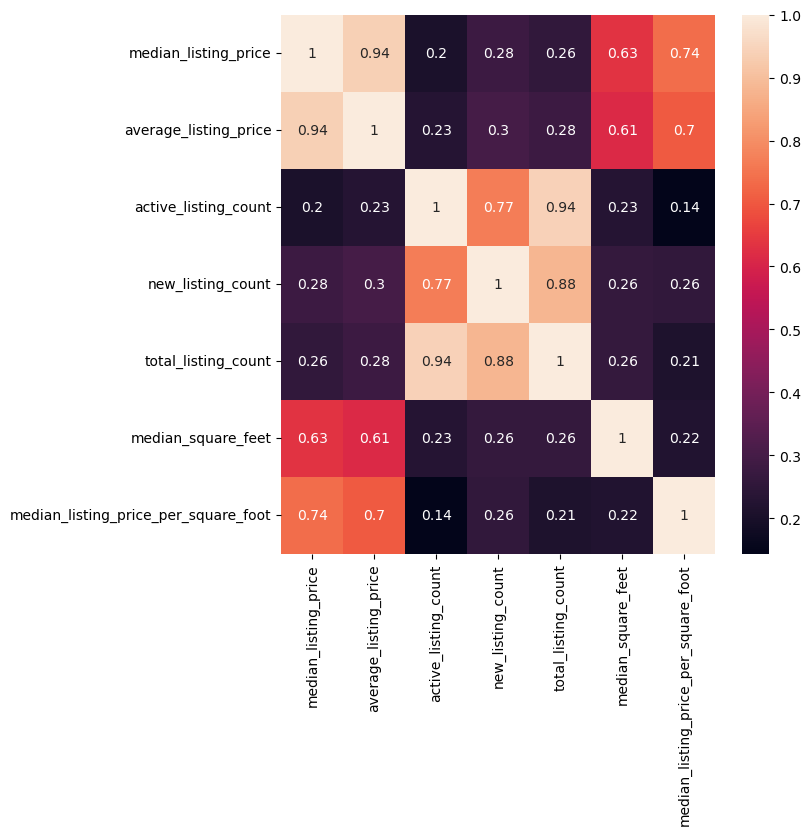

In [73]:
# Creating a subplot with matplotlib and setting the size
f,ax = plt.subplots(figsize=(7,7))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) 

I redid this after I cleaned duplicates from my merged df, and some of it changed quite a bit:

It's no surprise that variables related to average price are strongly correlated, though it's actually a lower correlation coefficient than I expected. Which indicates the average and median prices have a fairly large amount of gap between them sometimes.  Also no surprise that the various listing count variables are all very strongly correlated.

It's a little more interesting (though no more surprising) that square feet has a strong correlation to average price - i.e. the bigger the median size of the home, the greater the median/average listing price.

All of the other correlations are weak, though there's an *almost* moderate correlation between new/total listing counts and average listing price.  I.e. Higher average home prices have some correlation to more listings in the area.  Probably indicates that areas with hotter housing markets have people wanting to buy bigger homes as well.  Whereas areas with more depressed housing markets (i.e. less number of listings) probably tend to buy smaller homes.  Which probably follows well-recognized economic trends.

Median square feet has a weak (though nearly moderate) correlation with number of listings.  If there's any pattern to that, it would indicate that when houses are larger there are more of them listed on the market (i.e. more affluential markets have more buying/selling of homes happening more regularly).

At some point when I combine my datasets with rental data, it might show more interesting correlations (and I'll run some of those again then).

## 6. Scatterplots

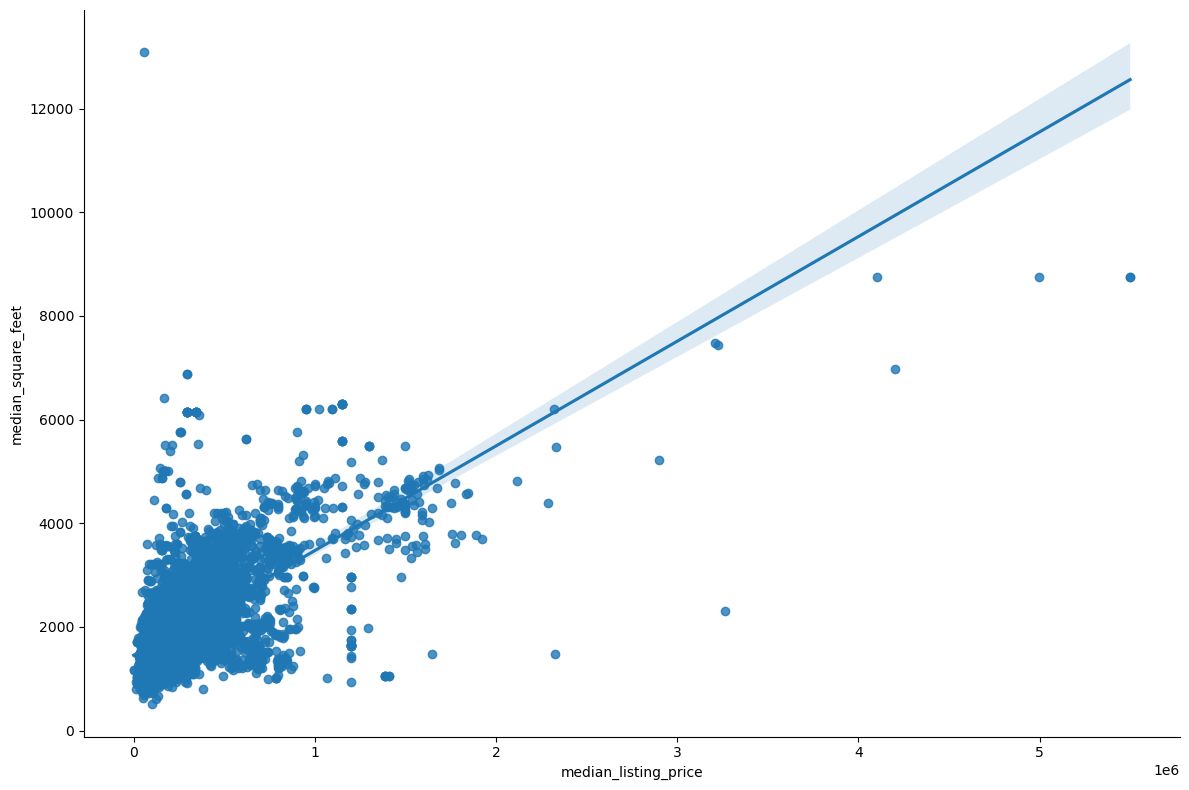

In [74]:
# Create a scatterplot for the "median_listing_price" and "median_square_feet" columns in seaborn

sns.lmplot(data=df_rh_zips, x='median_listing_price', y='median_square_feet', height=8, aspect=1.5)

I need to figure out what that outlier is above 12000 square feet, especially with such a low median listing price. Seems inaccurate

In [54]:
print(df_rh_zips[df_rh_zips['median_square_feet'] > 12000])

      month_date_yyyymm  postal_code city state  median_listing_price  \
8990             202104        68320  brock, ne               60000.0   
8991             202104        68320  brock, ne               60000.0   
8992             202104        68320  brock, ne               60000.0   

      median_listing_price_yy  active_listing_count  active_listing_count_yy  \
8990                  -0.6825                   1.0                      0.0   
8991                  -0.6825                   1.0                      0.0   
8992                  -0.6825                   1.0                      0.0   

      new_listing_count  new_listing_count_yy  \
8990                0.0                   NaN   
8991                0.0                   NaN   
8992                0.0                   NaN   

      median_listing_price_per_square_foot  \
8990                                   5.0   
8991                                   5.0   
8992                                   5.0   

    

So Brock NE (a tiny town in the middle of nowhere) in April 2021 had 1 listing of 13,000 square feet for $60k.  Obviously an unhelpful outlier (a random piece of property being foreclosed or something most likely).  I'm going to drop this value because it's too much of an outlier and throwing everything off.

But also, this seems to indicate duplicated rows there for some reason. Now I'll need to check all my rows for duplicates again.

In [63]:
# finding out how many duplicates there are.
df_rh_zips.duplicated().sum()

434732

That's crazy, that means there's only about 15,000 non-duplicates

OK, I checked the csv, and yes there are a TON of duplicates. Probably because each instance of a zip code from the df_ts database produced a single row from the df_rh database.  That's my guess.  So I need to use the df_ts database to spit out a list of unique zips that I'll then use to merge with df_rh database so that I don't get a lot of duplicate values. Let's see how that goes.

In [64]:
df_ts_zips = df_ts[['Zip', 'TysonZip']].drop_duplicates()

In [66]:
df_ts_zips.shape

(219, 2)

In [69]:
# Perform an inner merge based on matching values in "Zip" and "postal_code" columns
df_rh_zips = df_rh.merge(df_ts_zips[['Zip','TysonZip']], left_on='postal_code', right_on='Zip', how='inner')

In [70]:
df_rh_zips.shape

(17058, 20)

That gives over 70 historical rows for each of the 219 zip codes, so that's probably more realistic by far

In [71]:
# I'm going to export the historical realtor data again now that it's narrowed down to only zip codes with properties
# near food production facilities, and with all the duplicates removed

df_rh_zips.to_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Historical_FoodZips.csv'), index=False)

I'm going to redo the graphs above to see if anything changes without all the duplicates

In [5]:
# Now I'm going to drop that value above 12,000 square feet
df_rh_zips = df_rh_zips.drop(df_rh_zips[df_rh_zips['median_square_feet'] > 12000].index)

In [76]:
df_rh_zips.shape

(17057, 20)

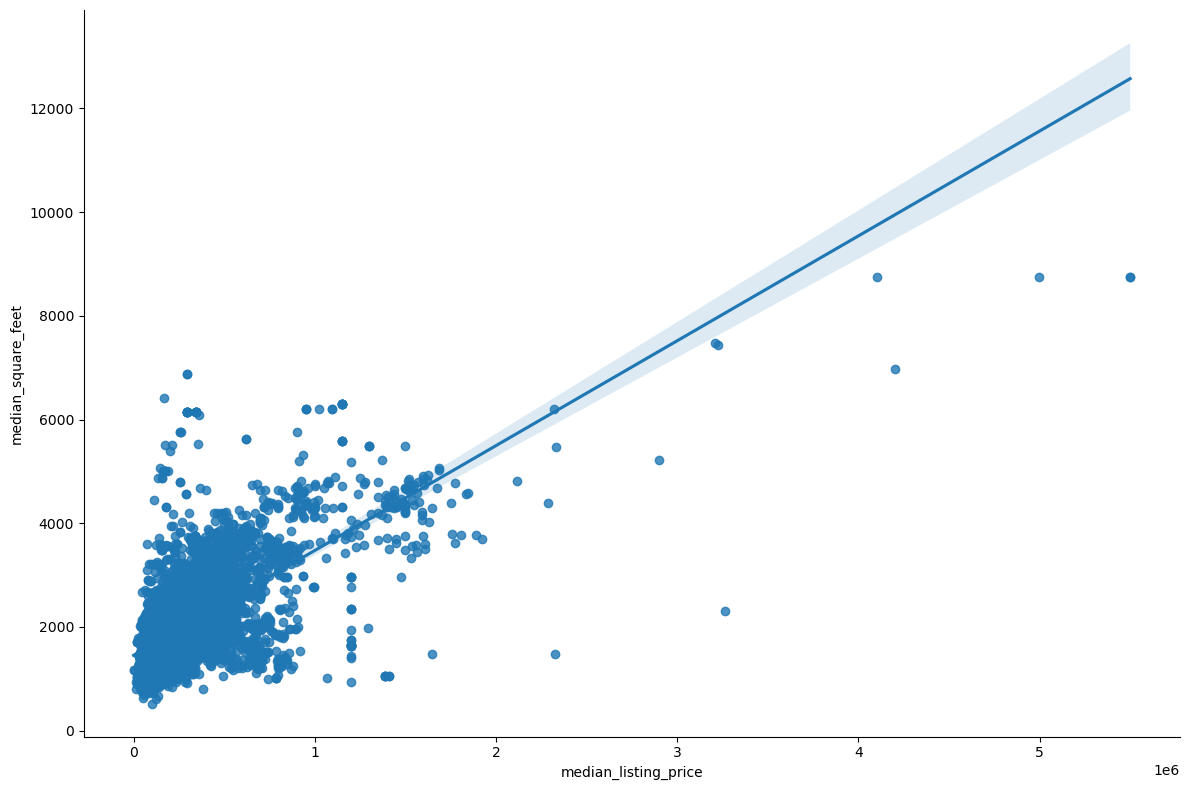

In [77]:
# Now I'm going to rerun that scatterplot

# Create a scatterplot for the "median_listing_price" and "median_square_feet" columns in seaborn

sns.lmplot(data=df_rh_zips, x='median_listing_price', y='median_square_feet', height=8, aspect=1.5)

It still looks essentially the same.  Nearly all data points when the price goes over $1.5m are below the correlation trend line, indicating that there's not a clear linear correlation here when price increases.  There are also a strong group of outliers with higher median_square_feet at low prices.  That makes it hard to say anything definitive with this.

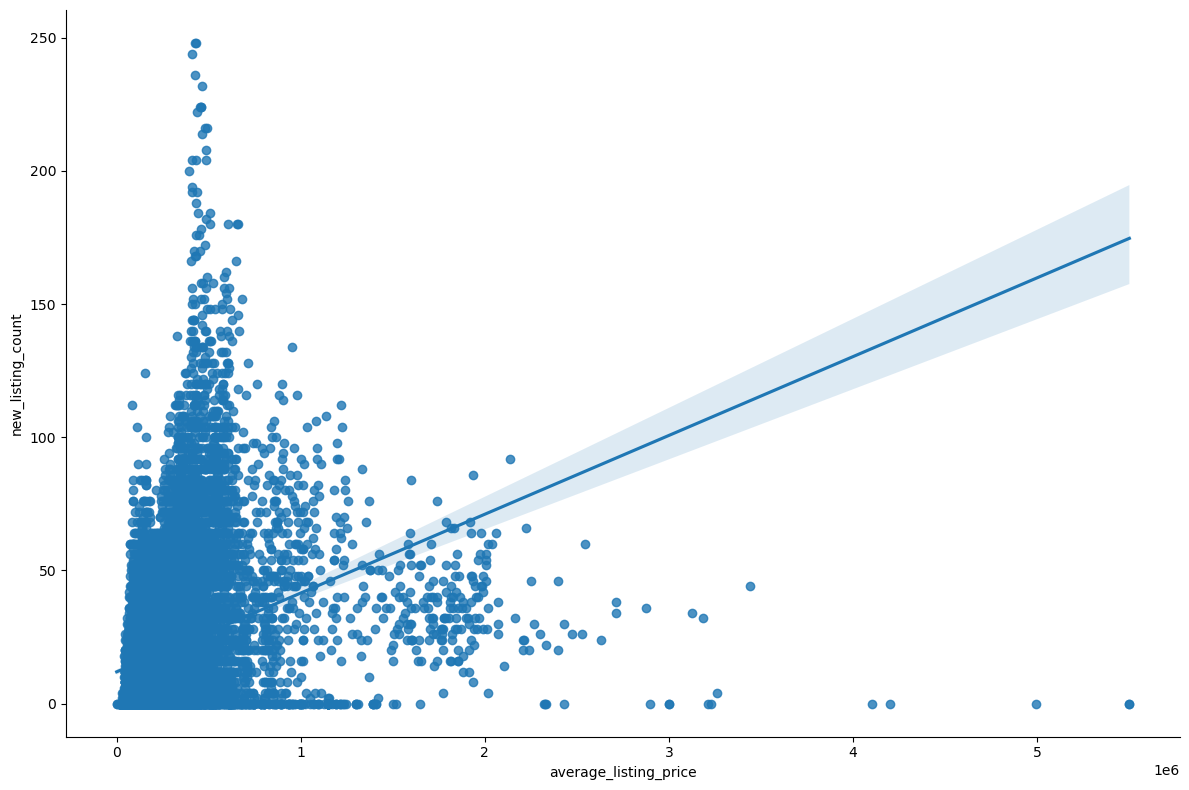

In [78]:
# I'm going to make a scatterplot for the "average_listing_price" and "new_listing_count" columns in seaborn

sns.lmplot(data=df_rh_zips, x='average_listing_price', y='new_listing_count', height=8, aspect=1.5)

That's interesting.  When I look at that, if I excluded the large mass of data at the bottom left, then I'd say that as average_listing_price increases (past 100,000), that new_listing_count decreases too (a negative correlation).  But the largest numbers of new listings are when the price is around $70,000 or so.  Makes me wonder what those homes are.

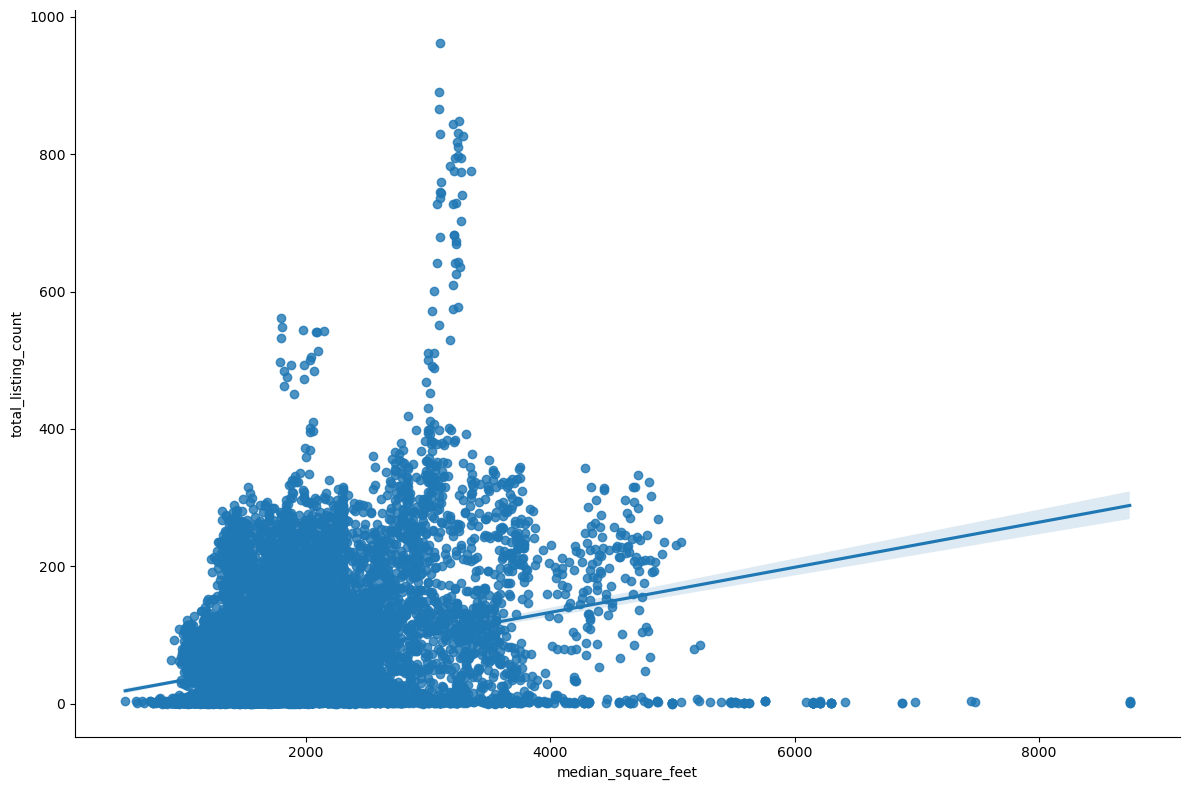

In [79]:
# I'm going to make a scatterplot for the "median_square_feet" and "total_listing_count" columns in seaborn

sns.lmplot(data=df_rh_zips, x='median_square_feet', y='total_listing_count', height=8, aspect=1.5)

This seems to show distinct clusters of home sizes.  Indicated that at around 3500 sqft and 2000 sqft there are more homes (in those markets that have a whole lot of homes listed).

## 7. Pair Plot

In [7]:
# Keeping only the variables I want to use in the pair plot

df_sub_2 = df_sub[['median_listing_price', 'total_listing_count', 'median_square_feet', 'median_listing_price_per_square_foot']]

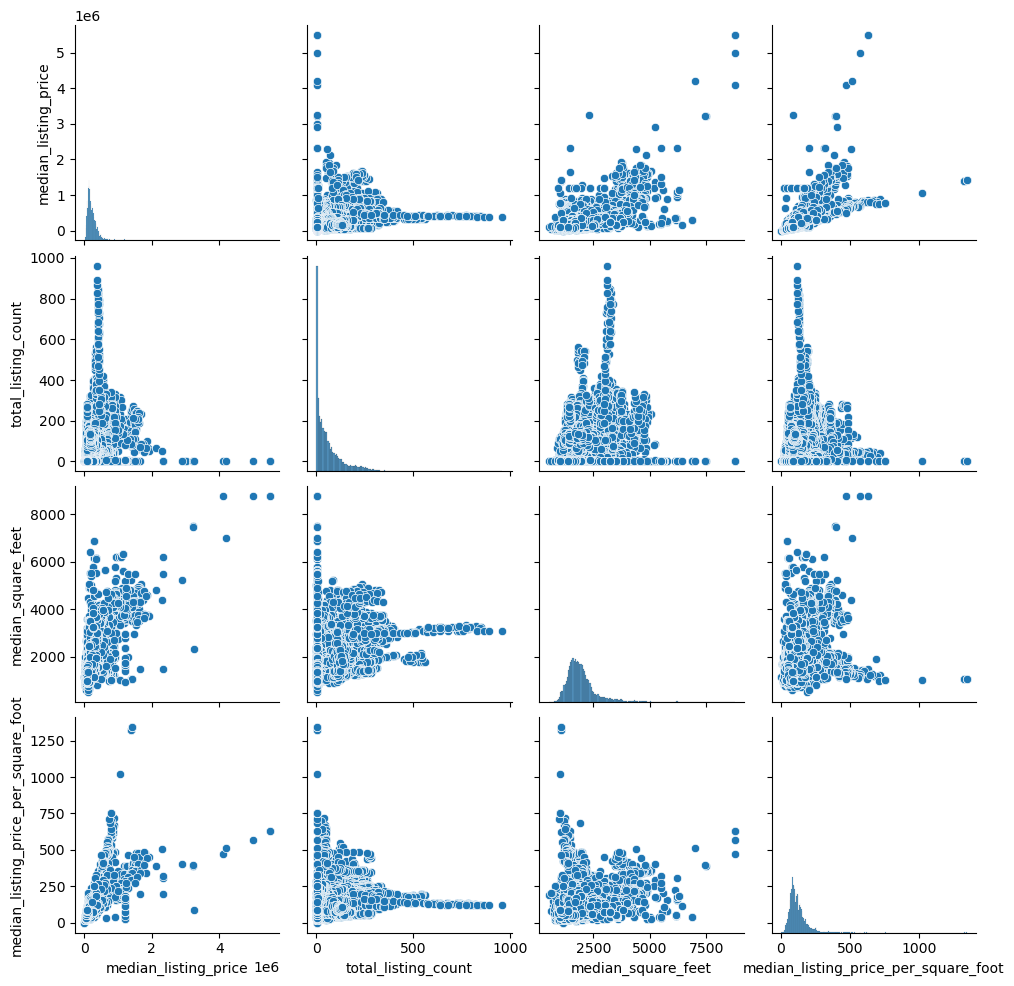

In [85]:
# Creating a pair plot 

g = sns.pairplot(df_sub_2)

I'm not sure what I think of this.  I think I have so many data points (even with only 17,000 rows) that it becomes hard to find meaningful info from graphs created so small as these (but with outliers intact).  In particular the histograms have clear bulges or concentrations but with such a wide range, that it makes it hard to see if the histograms have any effective categories.

Still, I think I'd be interested to see "median_square_feet" listings grouped because in the "total_listing_count" scatterplot they have clusters that stand out.  Maybe total_listing_count would be good to see more of its factors (though the categorical variable I'd use would probably have more to do with city or state, etc.).  Median_listing_price_per_square_foot might have some categories too though it's hard to see with the scale of this graph - but it seems there's a dip and peak there, and it might be geographically linked too.

## 8. Categorical Plot

<AxesSubplot:xlabel='median_listing_price_per_square_foot', ylabel='Count'>

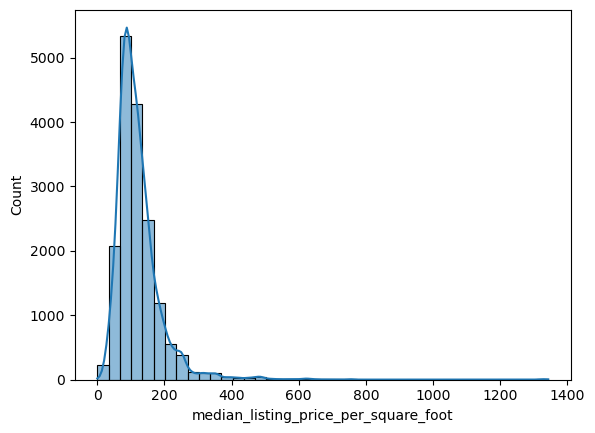

In [87]:
# Making histograms to find clusters

sns.histplot(df_rh_zips['median_listing_price_per_square_foot'], bins = 40, kde = True)

In [8]:
# I'm going to filter out all the high-priced homes, since there aren't many anyway, and focus on the more average home costs
# and see how they can be grouped

df_rh_common = df_rh_zips.drop(df_rh_zips[df_rh_zips['median_listing_price_per_square_foot'] > 350].index)

<AxesSubplot:xlabel='median_listing_price_per_square_foot', ylabel='Count'>

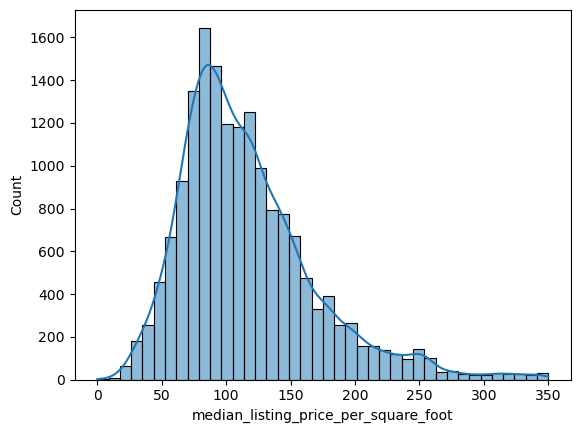

In [9]:
sns.histplot(df_rh_common['median_listing_price_per_square_foot'], bins = 40, kde = True)

That gives me something to work with

In [10]:
# Dividing listing-price-per-sqft into 3 categories.  I'm going to try to graph this two ways - with both my screened data
# and also try it with all the data, to see if the scale changes and makes it easier/harder to read

df_rh_common.loc[df_rh_common['median_listing_price_per_square_foot'] < 100, 'Price category'] = 'Affordable'
df_rh_common.loc[(df_rh_common['median_listing_price_per_square_foot'] >= 100) & (df_rh_common['median_listing_price_per_square_foot'] < 150), 'Price category'] = 'Medium-priced'
df_rh_common.loc[df_rh_common['median_listing_price_per_square_foot'] > 150, 'Price category'] = 'Expensive'

In [11]:
df_rh_zips.loc[df_rh_zips['median_listing_price_per_square_foot'] < 100, 'Price category'] = 'Affordable'
df_rh_zips.loc[(df_rh_zips['median_listing_price_per_square_foot'] >= 100) & (df_rh_zips['median_listing_price_per_square_foot'] < 150), 'Price category'] = 'Medium-priced'
df_rh_zips.loc[df_rh_zips['median_listing_price_per_square_foot'] > 150, 'Price category'] = 'Expensive'

In [12]:
df_rh_common['Price category'].value_counts(dropna = False)

Affordable       7497
Medium-priced    5794
Expensive        3417
NaN               113
Name: Price category, dtype: int64

In [13]:
df_rh_zips['Price category'].value_counts(dropna = False)

Affordable       7497
Medium-priced    5794
Expensive        3653
NaN               113
Name: Price category, dtype: int64

I guess 113 of them don't have median price per square foot values.  Also, the difference in numbers of "Expensive" between the two dataframes is very small.  So when I dropped those higher values before it was barely 200 different rows.

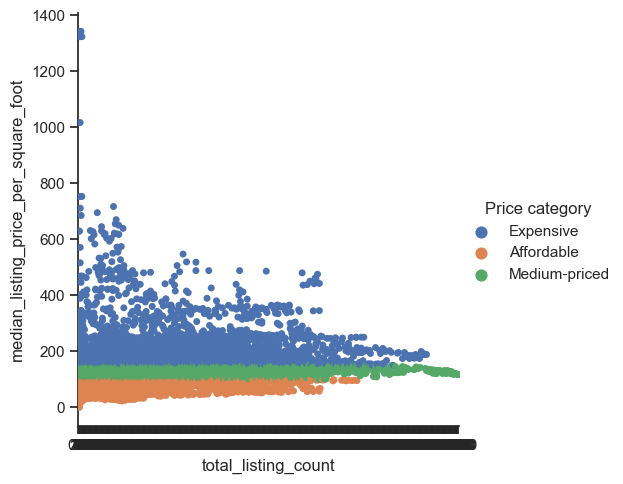

In [97]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="total_listing_count", y="median_listing_price_per_square_foot", hue="Price category", data=df_rh_zips)

That seems kinda pointless.  I mean, it's true that the "medium-priced" homes have the most total listings per zip code.  But it might not have the highest average number of total listings per zip code, as that would require me aggregating some more data in different ways first.

In [14]:
# I'm going to create "state" as the category to relook at some of these scatterplots to see if anything stands out

df_rh_zips['state'] = df_rh_zips['city state'].str.split(', ', expand=True)[1]

KeyboardInterrupt: 

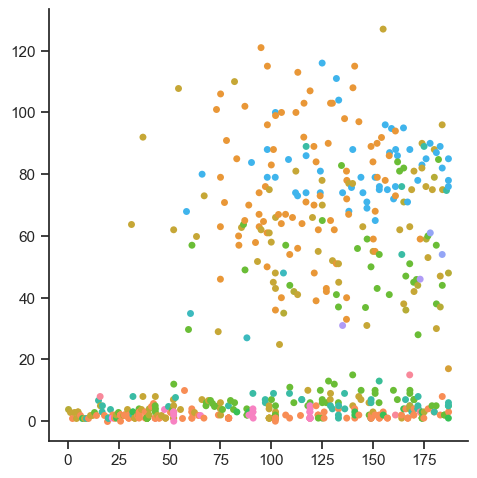

In [99]:
# Creating a categorical plot in seaborn using the state categories created above

sns.set(style="ticks")
g = sns.catplot(y="total_listing_count", x="median_square_feet", hue="state", data=df_rh_zips)

I waited on that for over 2 hours and it didn't complete.  So I interrupted it and you can see it's probably a garbled mess with no insight anyway.  I guess there are a few colors clustered with greater listings (particularly light blue), but no legend, so I can't do anything with that.

Also, not sure where it came up with some "False" values, but I'll check below.

In [101]:
df_rh_zips['state'].value_counts(dropna = False)

tx    3483
ia    2378
ne    1879
ar    1651
il    1372
ks     994
ky     930
mo     486
al     405
tn     405
wa     370
ga     324
nc     324
ms     243
mi     243
in     243
ok     196
oh     162
sd     162
va     159
or      81
pa      81
nj      81
wi      81
ca      81
fl      81
me      81
sc      81
Name: state, dtype: int64

In [4]:
# Importing my data again so I can try the visualizations again and hopefully they won't be so slow:

# - Realtor.com for sale properties at food production facility zip codes
df_rh_zips = pd.read_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Historical_FoodZips.csv'), index_col = False)

KeyboardInterrupt: 

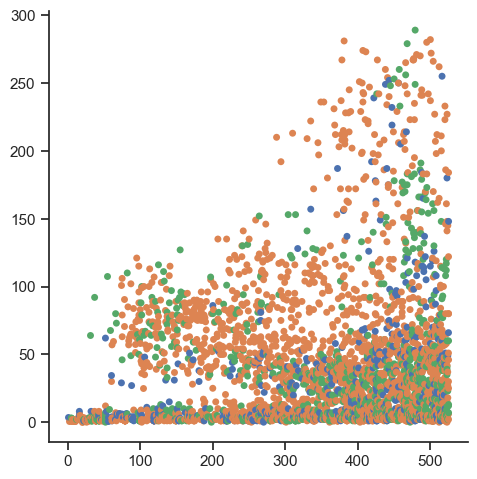

In [15]:
# I'll try one more categorical plot where the "Price Category" doesn't line up so obviously

sns.set(style="ticks")
g = sns.catplot(x="median_square_feet", y="total_listing_count", hue="Price category", data=df_rh_zips)

I had to interrupt the one above.  It also went over an hour and didn't finish.  Too many data points to make a categorical plot like this, I guess.  It looks too jumbled to determine anything, particularly without a legend.

<AxesSubplot:xlabel='total_listing_count', ylabel='Count'>

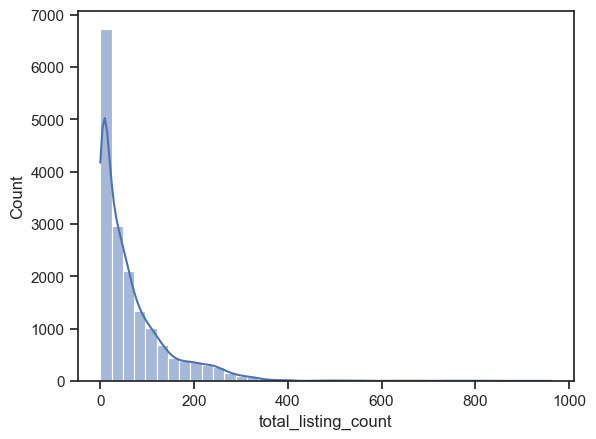

In [106]:
# I'm going to make a category for total_listing_count

# Making histograms to find clusters

sns.histplot(df_rh_zips['total_listing_count'], bins = 40, kde = True)

In [16]:
# Creating categories for total listing count:

df_rh_zips.loc[df_rh_zips['total_listing_count'] < 50, 'Availability'] = 'Few'
df_rh_zips.loc[(df_rh_zips['total_listing_count'] >= 50) & (df_rh_zips['total_listing_count'] < 150), 'Availability'] = 'Average'
df_rh_zips.loc[df_rh_zips['total_listing_count'] > 150, 'Availability'] = 'Plenty'

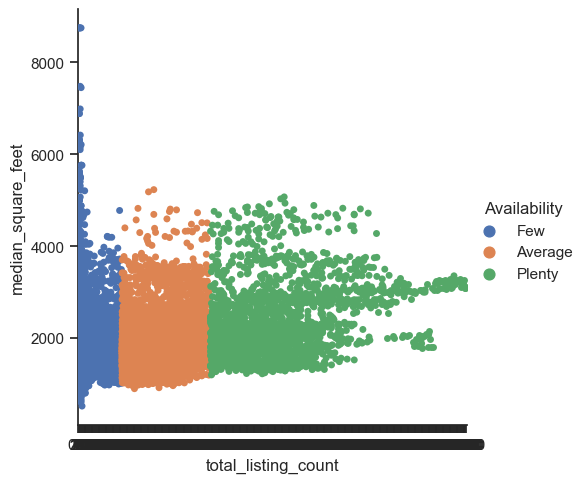

In [17]:
# Trying to make another categorical plot for Availability as listed above. Hopefully it'll go faster this time.

sns.set(style="ticks")
g = sns.catplot(x="total_listing_count", y="median_square_feet", hue="Availability", data=df_rh_zips)

I don't know how banding these really tells me much of anything. Locations with plenty of listings happen within a relatively narrow range of median square feet.  I'll try once with median listing price, but it will be my last one due to how long these take to process.

KeyboardInterrupt: 

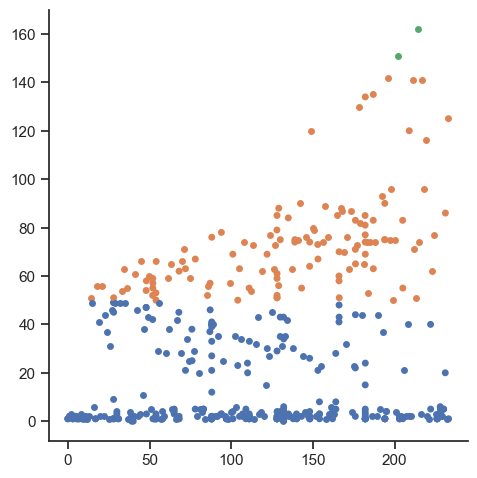

In [18]:
# Trying to make another categorical plot for Availability as listed above. Hopefully it'll go faster this time.

sns.set(style="ticks")
g = sns.catplot(y="total_listing_count", x="median_listing_price", hue="Availability", data=df_rh_zips)

This again took over an hour and didn't finish.  I have to get to bed.  I can't do multiple categorical plots without it being my full-time job.  This one looks like it *might* have given some insight, so maybe I'll try again sometime, but I have to complete this with what I have right now due to time constraints.

## 9. Project Questions Considered

####  1. We want to look at availability of houses for sale and units for rent in each of the locations with major food processing facilities

So far I'm just investigating relationships between variables in aggregated historical real estate data.  I haven't included modern (scraped) data yet, but will do so later on as this project develops.

#### 2. We also want to look at the price range of those homes and how many homes are available within certain price ranges that would typically be affordable to someone working at one of these food processing facilities.

Historically aggregated data can't do this. This question will have to wait until I can combine the various data sources.

#### 3. We will also explore the historical trend of houses for sale, number of homes listed, and the average costs of those homes and see what kind of trends might be forecast into the future. This information will be compared with present disaggregated data to try to guess how many homes were available within a certain price range in the past and use that to forecast what expectations might be for the future.

This will have to wait until a later lesson when we do regression and time series forecasting

#### 4. The same efforts will be taken in regards to rental home availability, though this may be harder with only “vacancy rate” information and not number of units available.

I don't yet have teh capability to do that.

#### 5. We would like to see if housing / rental prices go up or down when units for sale and vacancy percentages increase or decrease.

I may be able to do this if I create more categorical variables. However, with the amount of time currently taken to run a categorical plot on my current categorical variables, it's prohibitive to explore too many different areas at one time.



## 10. Hypotheses so far

It's difficult to create any strong data-based hypotheses so far with the limited data that I have from this relationship exploration.  It may be that the information I'm looking for has no strong internal relationships, and that's OK if that's the case.  Based on some of these scatterplots it looks like there are clusters of home sizes (by square feet) in markets with lots of listings.

I hypothesize that where homes for sale are scarce, that rental listings are scarce also.

Similarly, I hypothesize that where median for sale prices are high, that median rent prices are high also.

I hypothesize that, generally speaking, affordable housing in locations with food processing facilities is rare and often out of reach financially compared with compensation rates.

I hypothesize that in most locations for sale and rental housing availability is decreasing instead of increasing.

I hypothesize that in these same locations both renal and for sale housing availability is steadily increasing, especially in areas with larger population sizes (which will be demonstrated by having more homes for sale total listing count and more rental properties availabile).